# Create a timeseries of the different model prediction errors

In [105]:
import pandas as pd

#Get how the various grid points change according to Margaritas classification
change_in_fields = pd.read_pickle('tmp_data/change_in_fields.pkl')
change_in_fields['latitude_join'] = round(change_in_fields.latitude_ERA,3)
change_in_fields['longitude_join'] = round(change_in_fields.longitude_ERA,3) #just used for joining due to loss of precision from Margs file

In [106]:
# Load all the predictions before they are averaged over the year
V15 = pd.read_pickle('tmp_data/V15_predictions.pkl')
V20 = pd.read_pickle('tmp_data/V20_predictions.pkl')
V20X = pd.read_pickle('tmp_data/V20X_predictions.pkl')
V15X = pd.read_pickle('tmp_data/V15X_predictions.pkl')


In [107]:
V15['model'] = 'V15'
V20['model'] = 'V20'
V20X['model'] = 'V20X'
V15X['model'] = 'V15X'

In [108]:
V15.shape[0]+V20.shape[0]+V20X.shape[0]+V15X.shape[0]

150737500

In [109]:
#Join it all together into a single df
df_timeseries = pd.concat([V15,V20,V20X,V15X])
df_timeseries['latitude_join'] = round(df_timeseries.latitude_ERA,3)
df_timeseries['longitude_join'] = round(df_timeseries.longitude_ERA,3)
df_timeseries.shape

(150737500, 12)

In [110]:
#Create some extra time cols
df_timeseries['month'] = pd.DatetimeIndex(df_timeseries.time).month
df_timeseries['day'] = pd.DatetimeIndex(df_timeseries.time).date

---

## Plot Lake category

In [1]:
#Create a mask to filter by
lake_condition = 'clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant'
northern_canada_condition = '50.0 < latitude_ERA & -130 < longitude_ERA < -80'
lake_condition = northern_canada_condition



mask = change_in_fields.query(lake_condition)
df_timeseries_categorized = pd.merge(df_timeseries,mask,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized = df_timeseries_categorized.reset_index()


NameError: name 'change_in_fields' is not defined

In [2]:

import numpy as np
import matplotlib.pyplot as plt
from matplotlib import animation, rc
from IPython.display import HTML
import matplotlib.colors as mc
import matplotlib.colorbar as cb
from matplotlib.gridspec import GridSpec
import cartopy.crs as ccrs
import seaborn as sns

import sys




def plot_timeseries(df,savefig):

    h,w = 20,20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, ax1 = plt.subplots(nrows=1, ncols=1, figsize=(h,w))

    p = sns.lineplot(data=df, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax1,markers=True)
    #p = sns.lineplot(data=df, x="month", y='predicion_error',hue='model', style='model', ci=None,ax=ax1,markers=True)

    ax1.set_xlabel("Month",fontsize=34)
    ax1.set_ylabel("Mean Prediction Error (K)",fontsize=34)
    ax1.legend().set_title(None)
    
    ax1.tick_params(labelsize=30)
    #cax.set_xlabel(r'$\delta$K',fontsize=34)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    
    


    

In [3]:
plot_timeseries(df_timeseries_categorized.query('model != "V15X"'),savefig=None)

NameError: name 'df_timeseries_categorized' is not defined

## Strong lake category, no veg

In [114]:
#Create a mask to filter by
lake_condition_strong = 'clFr_change_is_significant & dl_change_is_significant & not oceanFr_change_is_significant & not cvhFr_change_is_significant & not cvlFr_change_is_significant'
mask_strong = change_in_fields.query(lake_condition_strong)
df_timeseries_categorized_LS = pd.merge(df_timeseries,mask_strong,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_LS = df_timeseries_categorized_LS.reset_index()


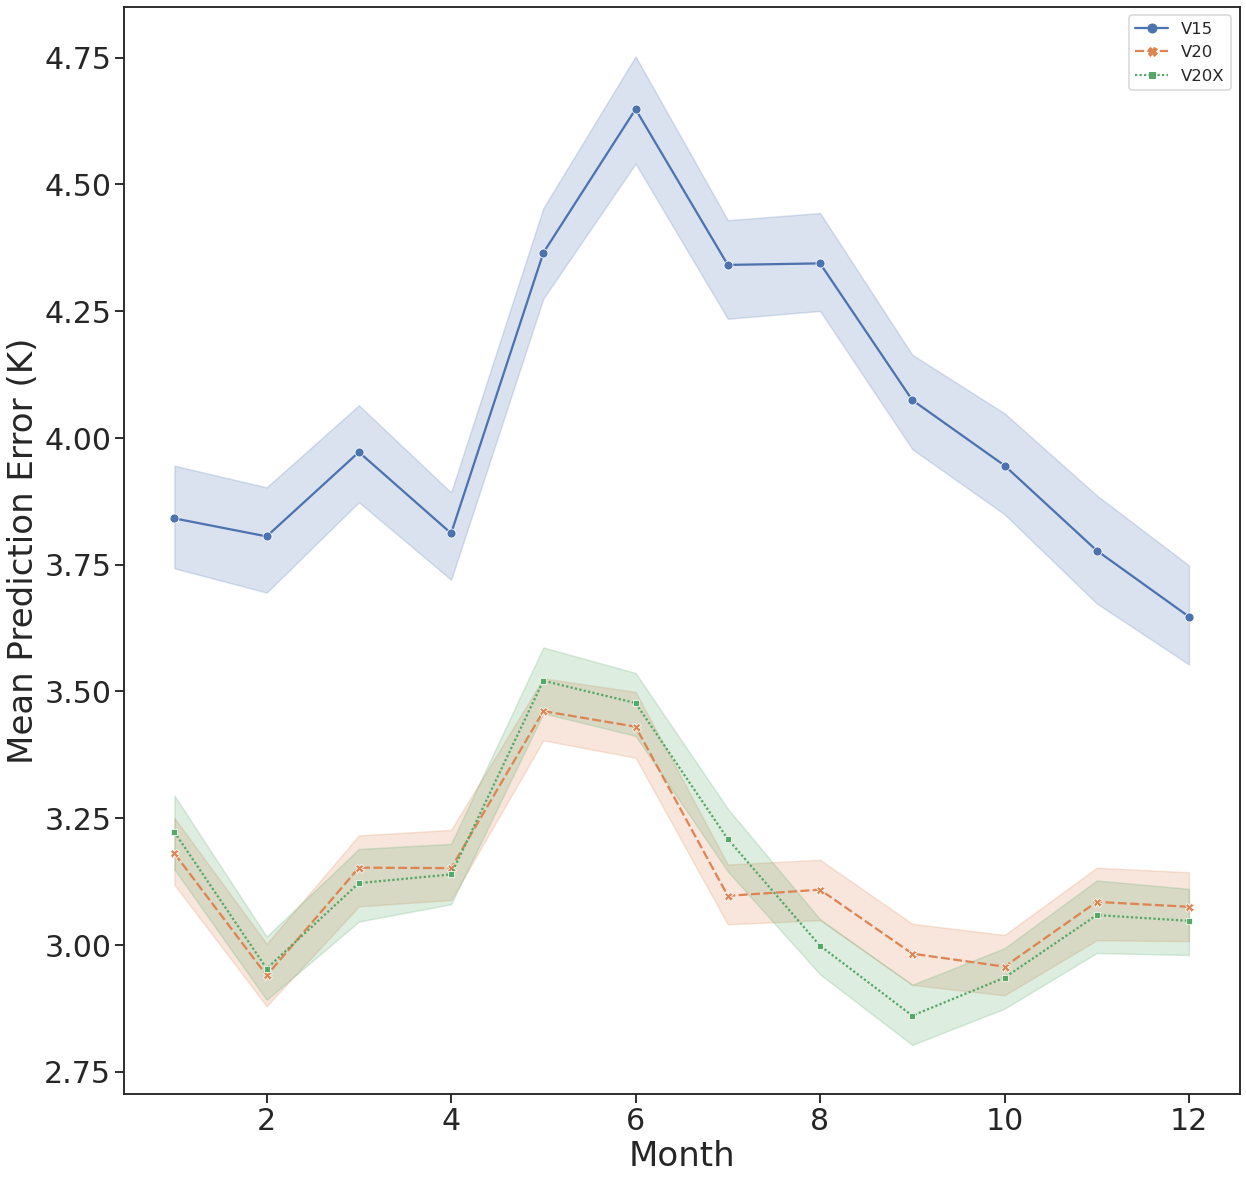

In [115]:
plot_timeseries(df_timeseries_categorized_LS.query('model != "V15X"'),savefig=None)

## Vegetation

In [116]:
#Create a mask to filter by
veg_condition = 'cvhFr_change_is_significant & not clFr_change_is_significant'
mask_veg = change_in_fields.query(veg_condition)
df_timeseries_categorized_veg = pd.merge(df_timeseries,mask_veg,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_veg = df_timeseries_categorized_veg.reset_index()


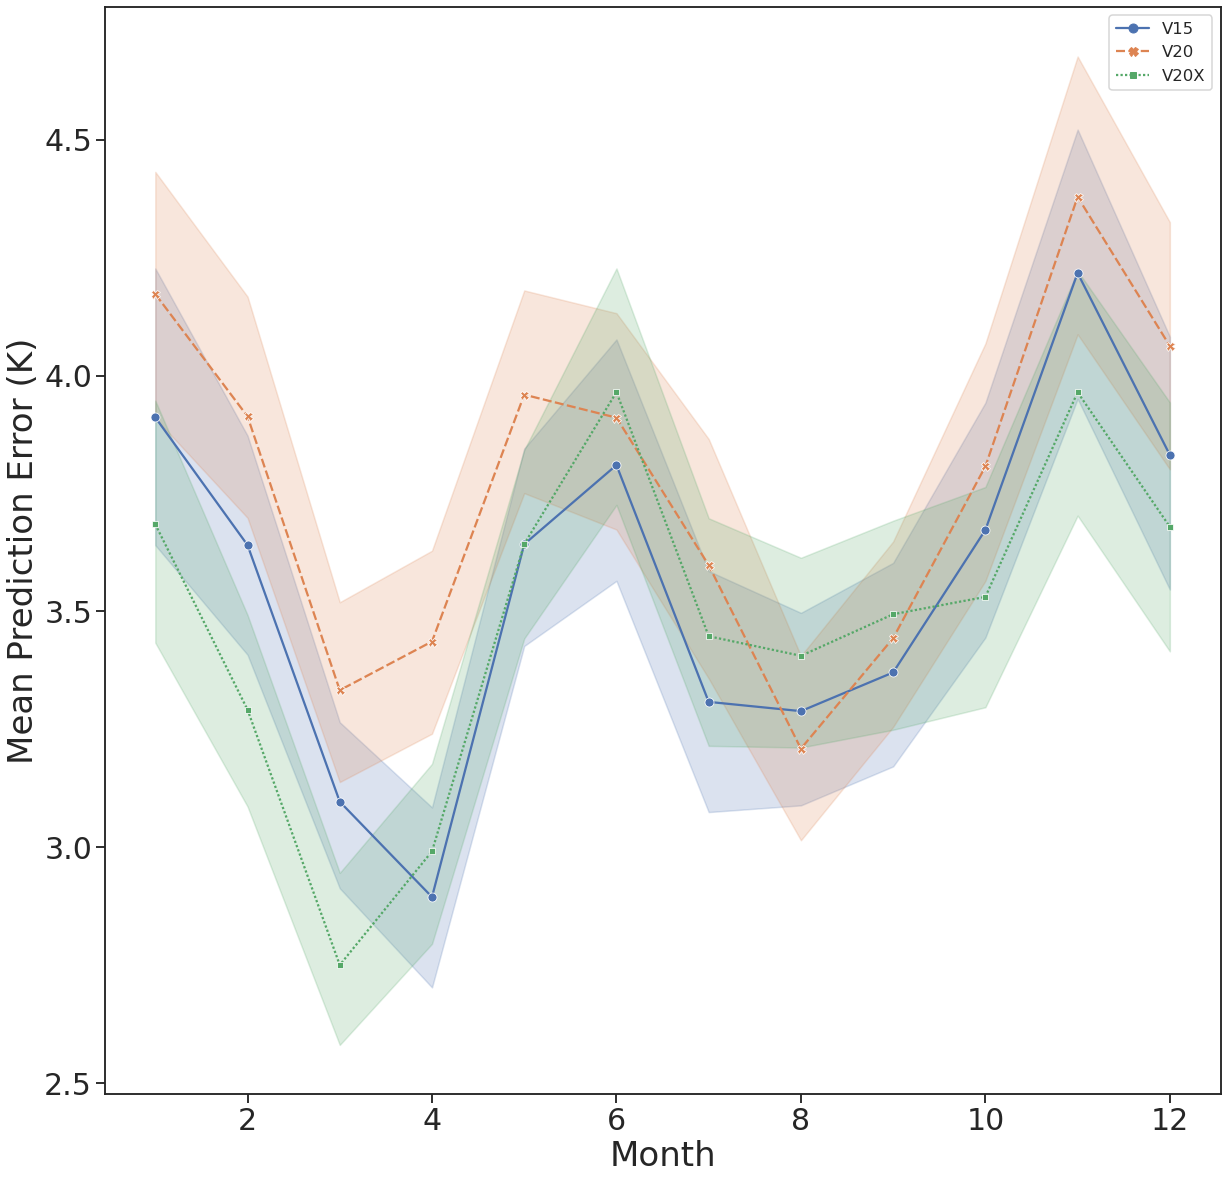

In [117]:
plot_timeseries(df_timeseries_categorized_veg.query('model != "V15X"'),savefig=None)

## Glacier

In [118]:
#Create a mask to filter by
glacier_condition = 'si10Fr_change_is_significant'
mask_glacier = change_in_fields.query(glacier_condition)
df_timeseries_categorized_glacier = pd.merge(df_timeseries,mask_glacier,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_glacier = df_timeseries_categorized_glacier.reset_index()


In [ ]:
plot_timeseries(df_timeseries_categorized_glacier.query('model != "V15X"'),savefig=None)


In [103]:
def plot_mega_stacked_timeseries(df1,df2,df3,df4,savefig):

    h,w = 20,2*20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(h,w),sharex=True)
    ax2.text(0.5,0.5,"fddfdddffd")

    
    
    p1 = sns.lineplot(data=df1, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax1,markers=True)
    p2 = sns.lineplot(data=df2, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax2,markers=True,legend=False)
    p3 = sns.lineplot(data=df3, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax3,markers=True,legend=False)
    p4 = sns.lineplot(data=df4, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax4,markers=True,legend=False)

    
    
    # ALL AXES
    for ax in [ax1,ax2,ax3,ax4]:
        ax.set_ylabel("Mean Prediction Error (K)",fontsize=34)
        ax.tick_params(labelsize=30)
        
        
    for ax in [ax1,ax2,ax3]:
        ax.tick_params(
                      axis='x',          # changes apply to the x-axis
                      which='both',      # both major and minor ticks are affected
                      bottom=False,      # ticks along the bottom edge are off
                      top=False,         # ticks along the top edge are off
                      labelbottom=False) # labels along the bottom edge are o


#     for ax in [ax2]:
#         ax.tick_params(
#         axis='x',          # changes apply to the x-axis
#         which='both',      # both major and minor ticks are affected
#         bottom=False,      # ticks along the bottom edge are off
#         top=False,         # ticks along the top edge are off
#         labelbottom=False) # labels along the bottom edge are o
#         ax.set_xlabel("")
#         ax.set_ylabel("Mean Prediction Error (K)",fontsize=34)
#         ax.legend().set_title(None)
#         
        

    # AX1
    ax1.legend().set_title(None)
            
    #AX4    
    ax4.set_xlabel("Month",fontsize=34)

    #ax1.text(0.5,0.5,"HELLO")
    
    ax1.text(0,0.5,"fddfdddffd")
    
    
    
    plt.subplots_adjust(wspace=0.01, hspace=0.01)

    
#     ax3.set_xlabel("Month",fontsize=34)
#     #ax3.legend().set_title(None)
#     ax3.tick_params(labelsize=30)
    
    
#     #ax2.set_ylim(2.4,4.75)
#     #ax3.set_ylim(2.4,4.75)

    
#     plt.setp(ax2.get_yticklabels()[0], visible=False)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    

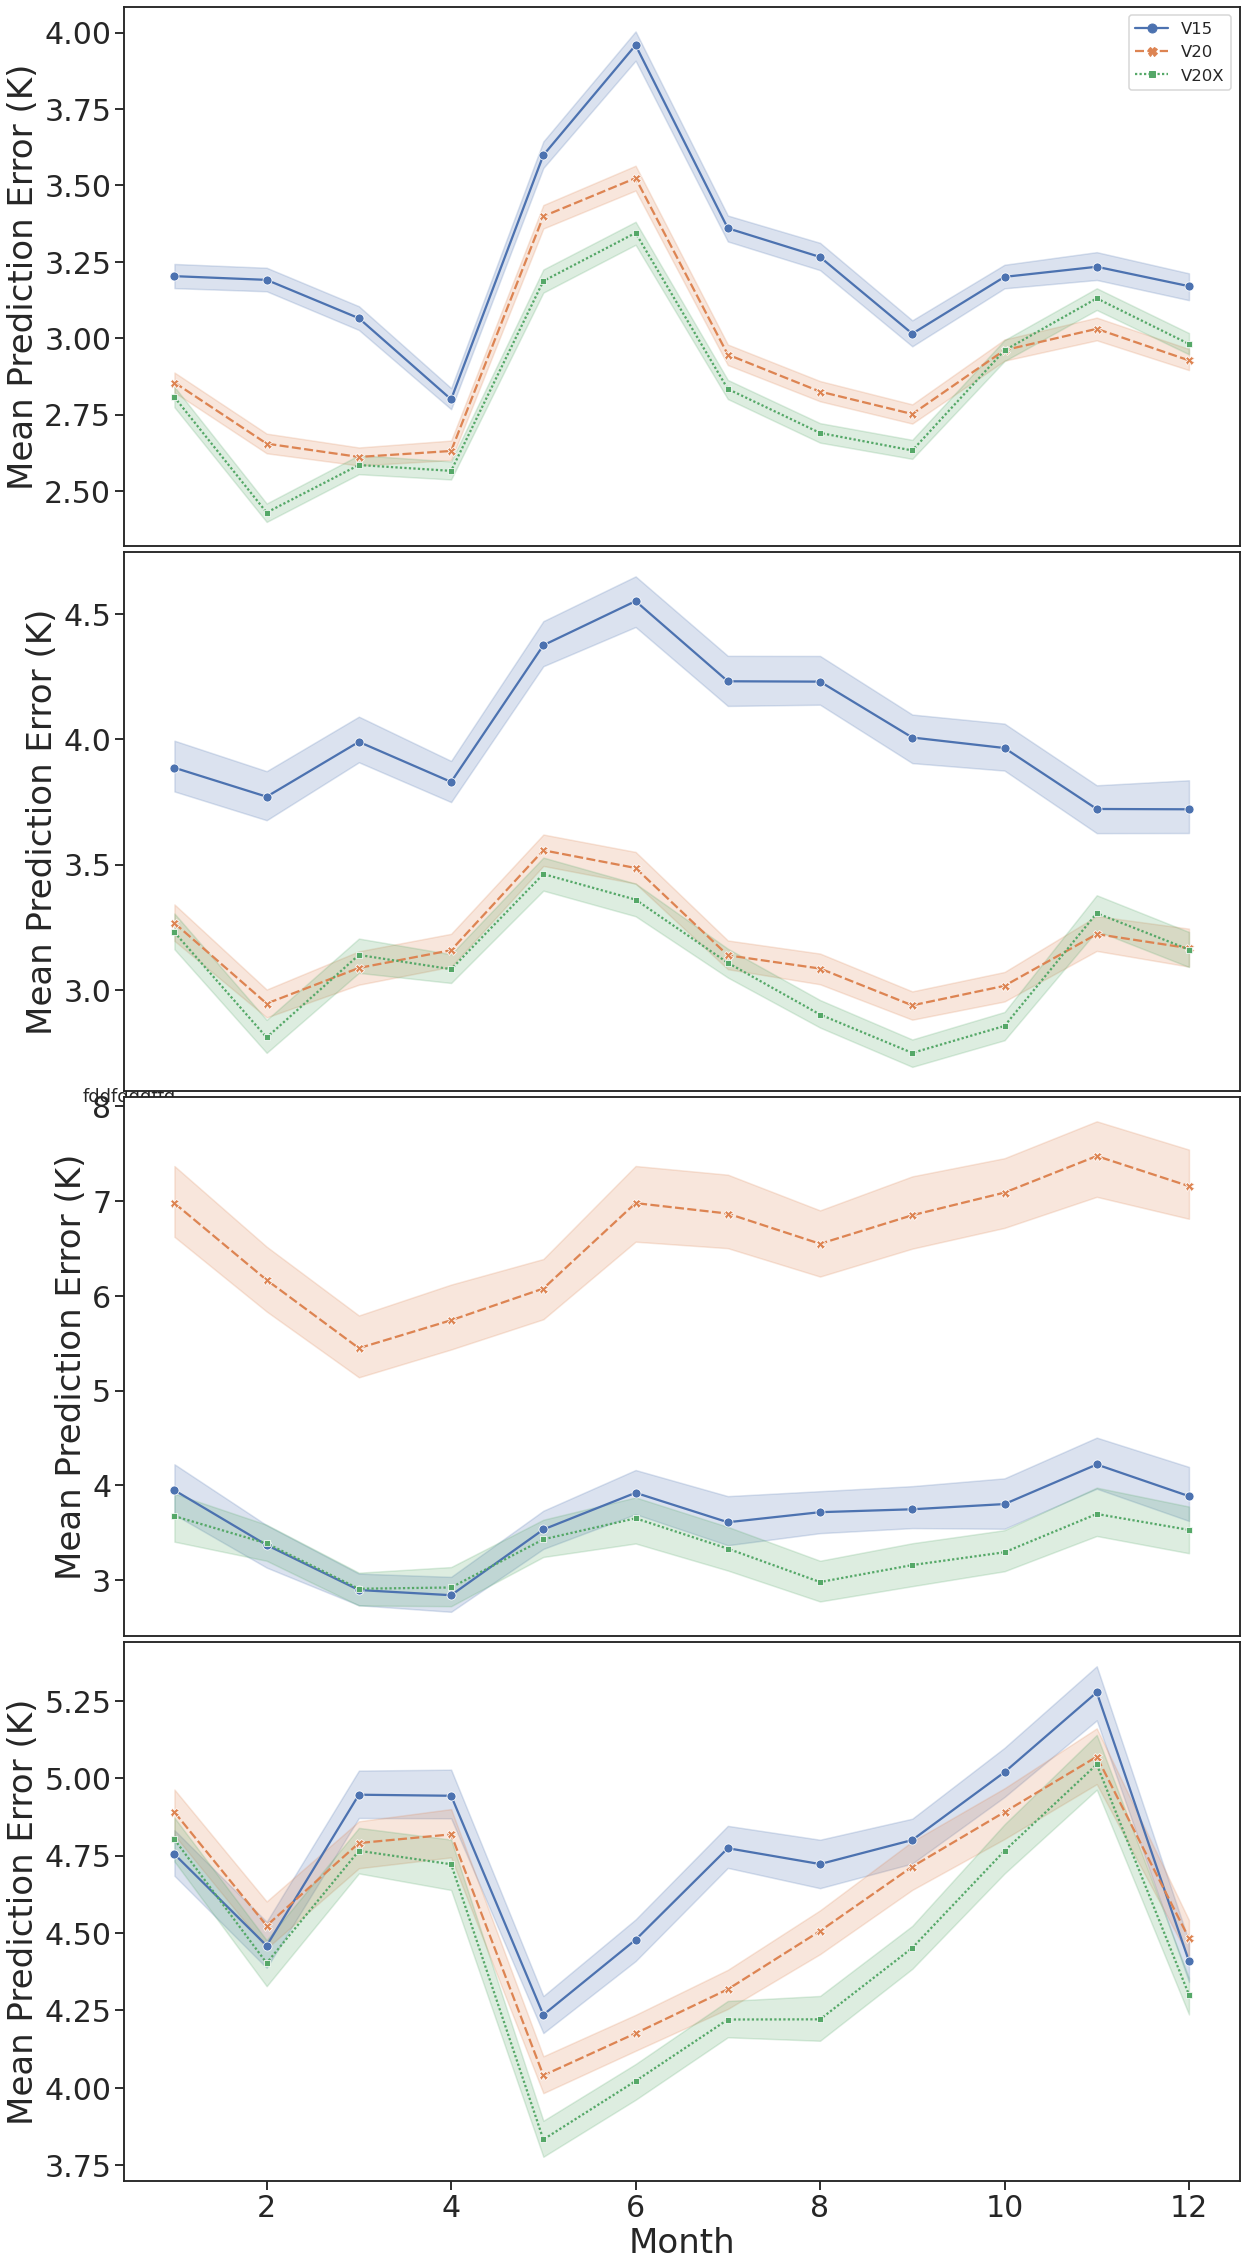

In [104]:





df1 = df_timeseries_categorized.query('model != "V15X"')
df2 = df_timeseries_categorized_LS.query('model != "V15X"')
df3 = df_timeseries_categorized_veg.query('model != "V15X"')
df4 = df_timeseries_categorized_glacier.query('model != "V15X"')

plot_mega_stacked_timeseries(df1,df2,df3,df4,savefig='figs/mega_stack.png')

Text(0.6, 0.5, 'fddfdddffd')

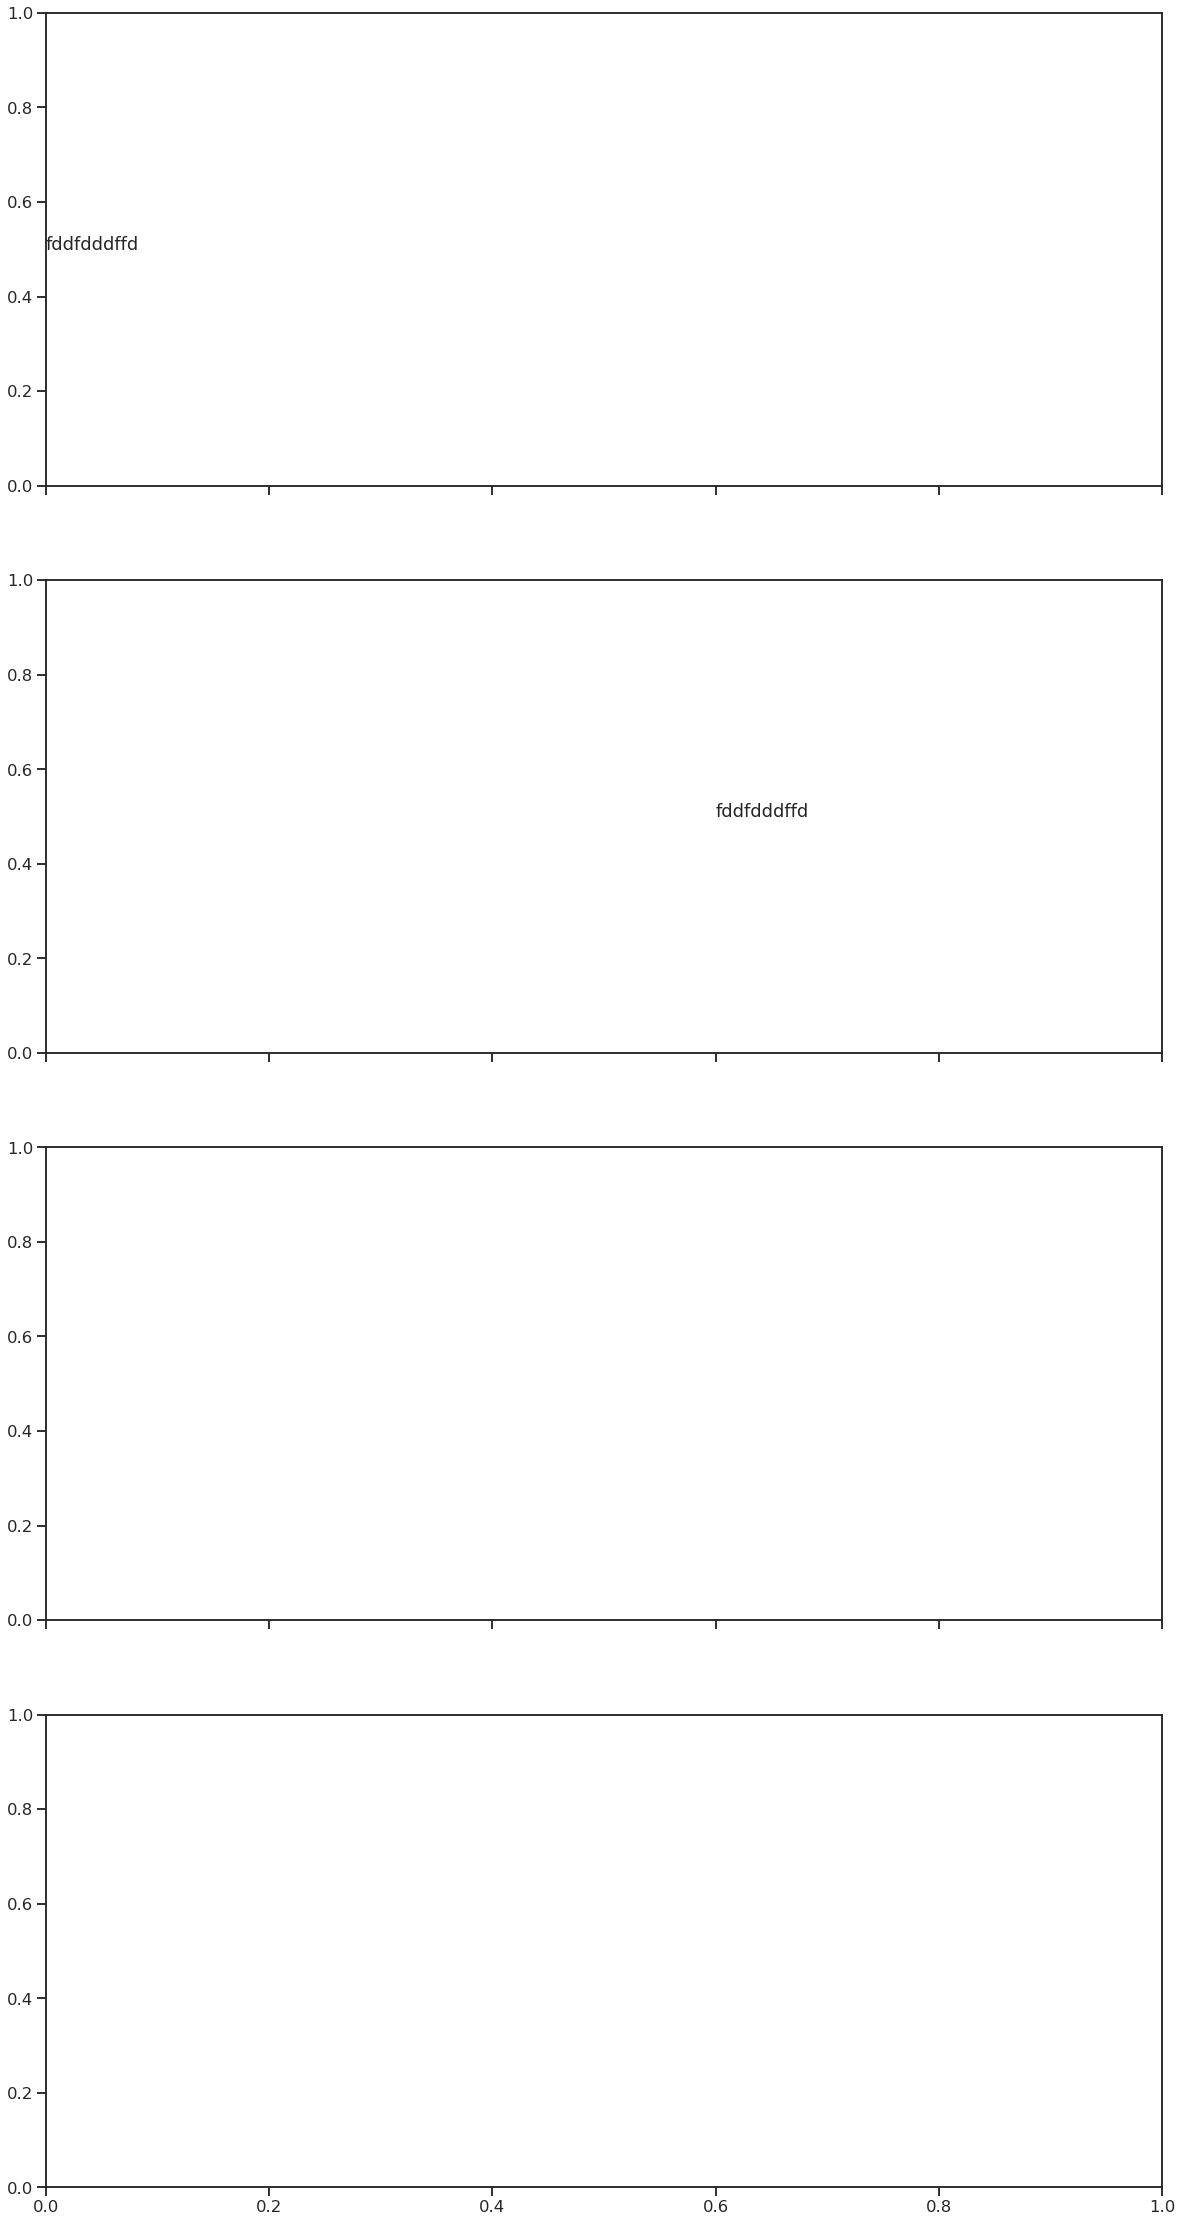

In [102]:
h,w = 20,2*20
fig, (ax1,ax2,ax3,ax4) = plt.subplots(nrows=4, ncols=1, figsize=(h,w),sharex=True)
ax1.text(0,0.5,"fddfdddffd")
ax2.text(0.6,0.5,"fddfdddffd")

---

## Particular points


### Chott Melrhir

In [55]:
chott_lat = round(34.145187223212716,3)
chott_lon = round(6.0800000000000125,3)

#Create a mask to filter by
chott_condition = f'latitude_join == {chott_lat} & longitude_join == {chott_lon}'
chott_mask = change_in_fields.query(chott_condition)
df_timeseries_categorized_chott = pd.merge(df_timeseries,chott_mask,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_chott = df_timeseries_categorized_chott.reset_index()



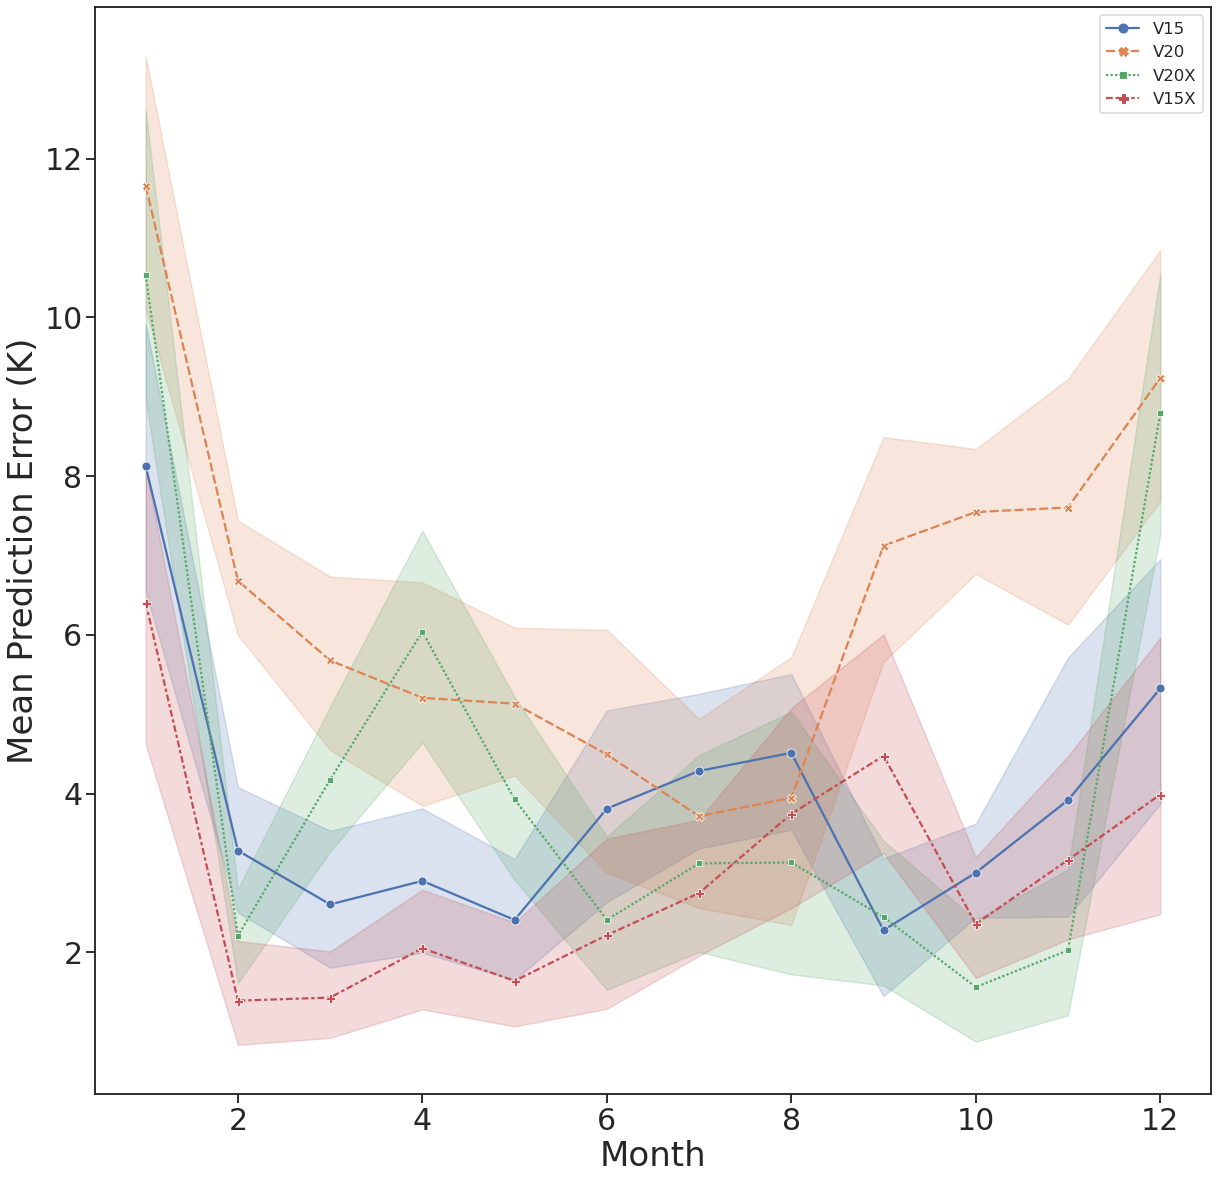

In [56]:
plot_timeseries(df_timeseries_categorized_chott,savefig=None)

## Salt lake city

In [57]:
SLC_lat = round(41.17094491970063,3)
SLC_lon = round(-113.39999999999998,3)

#Create a mask to filter by
SLC_condition = f'latitude_join == {SLC_lat} & longitude_join == {SLC_lon}'
SLC_mask = change_in_fields.query(SLC_condition)
df_timeseries_categorized_SLC = pd.merge(df_timeseries,SLC_mask,how='inner',on=['latitude_join', 'longitude_join']) #inner join.
df_timeseries_categorized_SLC = df_timeseries_categorized_SLC.reset_index()



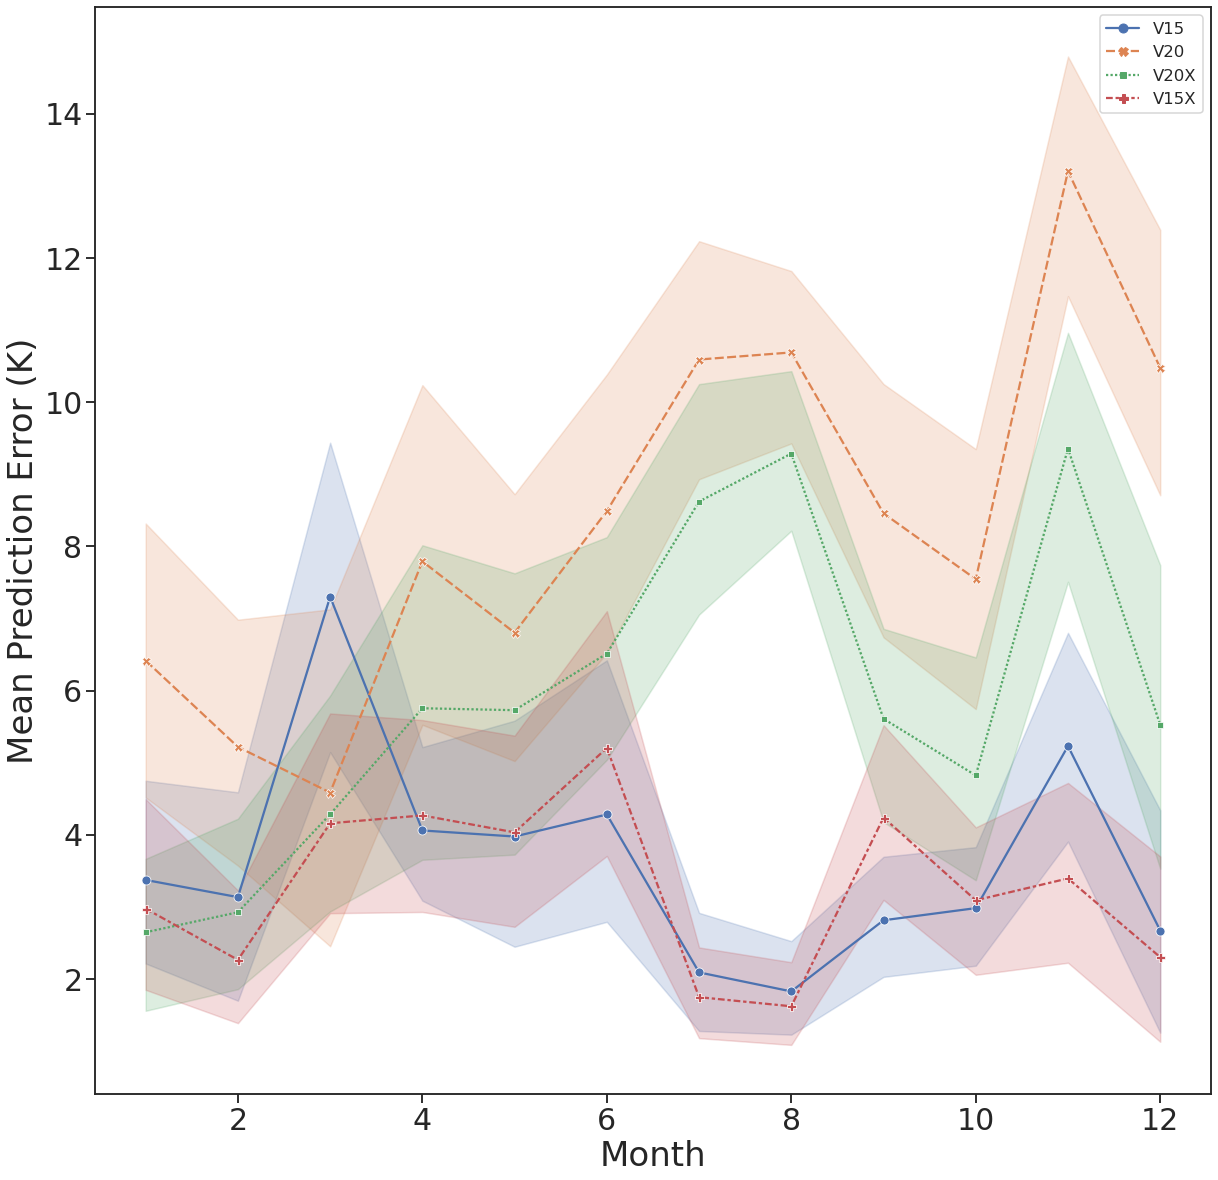

In [58]:
plot_timeseries(df_timeseries_categorized_SLC,savefig=None)

## Stacked - Lakes

In [69]:
def plot_stacked_timeseries(df2,df3,savefig):

    h,w = 20,2*20

    sns.set_theme(context='talk', 
                  style='ticks', 
                  palette='deep',
                  rc={'figure.figsize':(h,w)}
                  )

    fig, (ax2,ax3) = plt.subplots(nrows=2, ncols=1, figsize=(h,w))
    p2 = sns.lineplot(data=df2, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax2,markers=True)
    p3 = sns.lineplot(data=df3, x="month", y='predicion_error',hue='model', style='model', ci=99,ax=ax3,markers=True,legend=False)


    

    for ax in [ax2]:
        ax.tick_params(
        axis='x',          # changes apply to the x-axis
        which='both',      # both major and minor ticks are affected
        bottom=False,      # ticks along the bottom edge are off
        top=False,         # ticks along the top edge are off
        labelbottom=False) # labels along the bottom edge are o
        ax.set_xlabel("")
        ax.set_ylabel("Mean Prediction Error (K)",fontsize=34)
        ax.legend().set_title(None)
        ax.tick_params(labelsize=30)
        


    
    
    
    plt.subplots_adjust(wspace=0.01, hspace=0.01)

    
    ax3.set_xlabel("Month",fontsize=34)
    ax3.set_ylabel("Mean Prediction Error (K)",fontsize=34)
    #ax3.legend().set_title(None)
    ax3.tick_params(labelsize=30)
    
    
    #ax2.set_ylim(2.4,4.75)
    #ax3.set_ylim(2.4,4.75)

    
    plt.setp(ax2.get_yticklabels()[0], visible=False)

    if savefig is not None:
        plt.savefig(savefig,bbox_inches='tight', pad_inches=0, dpi=300)    

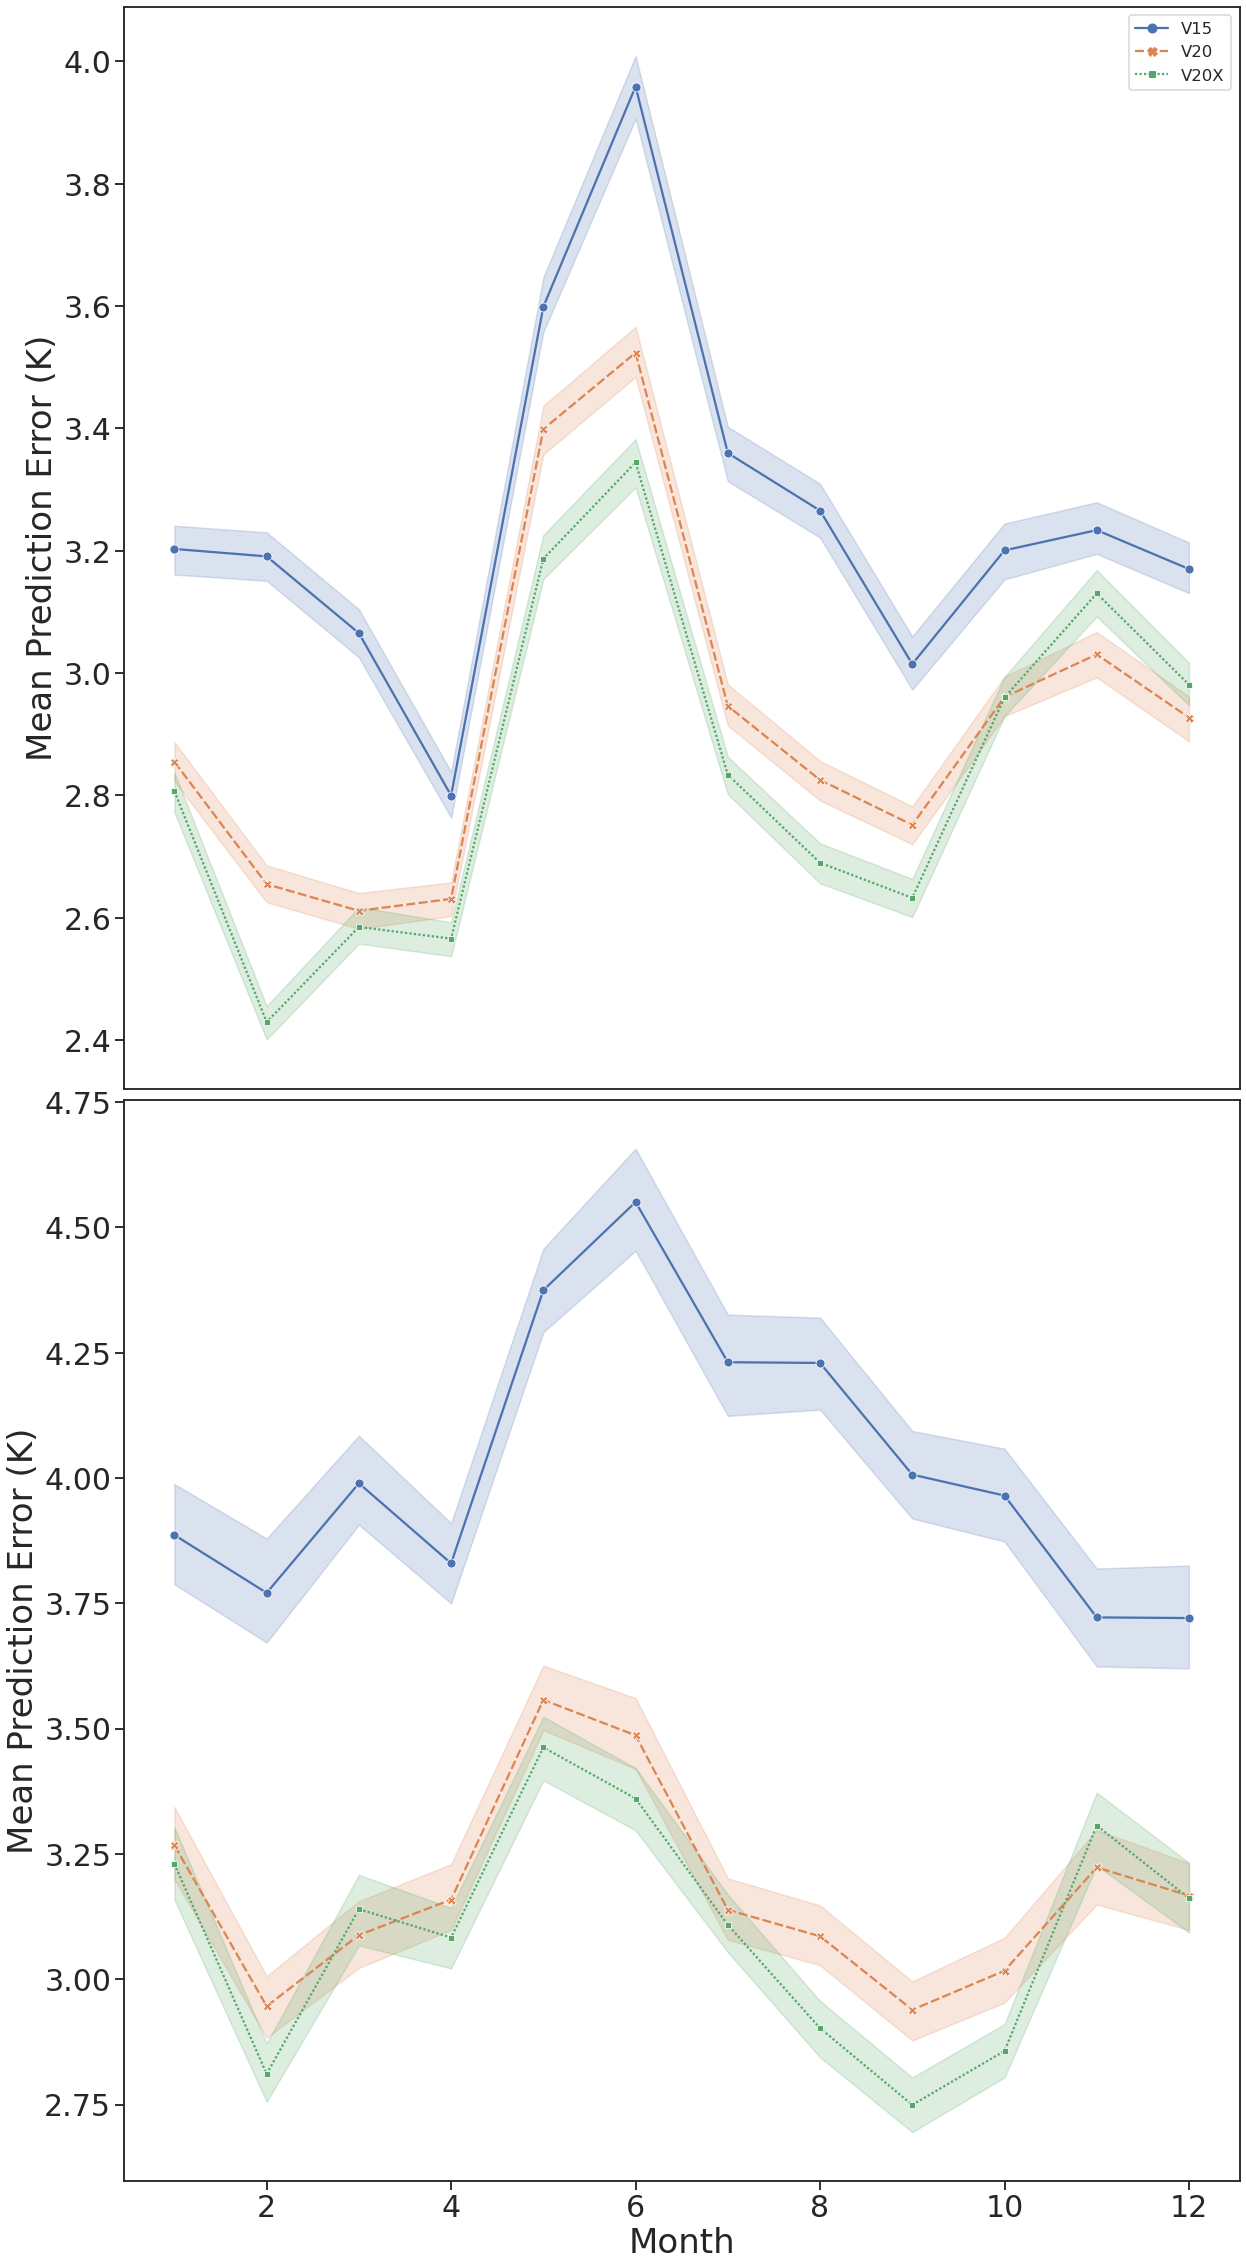

In [71]:
plot_stacked_timeseries(df_timeseries_categorized.query('model != "V15X"'),df_timeseries_categorized_LS.query('model != "V15X"'),savefig='figs/stacked_timeseries_lakes.png')